Project Task: Week 1:

Exploratory Data Analysis:

Merge both the datasets.
Plot the merged dataset as a hierarchically-clustered heatmap.
Perform Null-hypothesis testing.
 

Project Task: Week 2: 

Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.
Input: Complete dataset including all genes (20531)
Output: Selected Genes from each dimensionality reduction method
 

Project Task: Week 3: 

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.

 

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type 

 

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

 

Project Task: Week 4: 

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer.

Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

 

Download the Data sets from here.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings("ignore", category=stats.ConstantInputWarning)

In [3]:
#  Database 1
df_1 = pd.read_csv("Capston_Healthcare.csv")

In [4]:
# Database 2
df_2 = pd.read_csv("Capston_labels.csv")

In [5]:
df_1.head(10)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
5,sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
6,sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
7,sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
8,sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
9,sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


In [6]:
df_1.shape

(801, 20532)

In [7]:
df_2.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [8]:
df_2.shape

(801, 2)

In [9]:
# Merging 2 data in common column.
df = pd.merge(df_1, df_2, on ="Unnamed: 0")

In [10]:
df.shape

(801, 20533)

In [11]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [12]:
# Renaming the column Unnamed:o0 to Sample
df.rename(columns = {"Unnamed: 0": "Sample"}, inplace = True)

In [13]:
df.head()

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [14]:
# Checking if null values
df.isnull().sum()

Sample        0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [15]:
# Class is the cancer type and the most important feature so naming it target_variable
target_variable  = df[["Class"]]

In [16]:
df.head(2)

,Sample,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD


In [17]:
target_variable.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [18]:
df["Class"].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [19]:
target_variable.value_counts()

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

In [20]:
len(target_variable)

801

<Axes: xlabel='Class'>

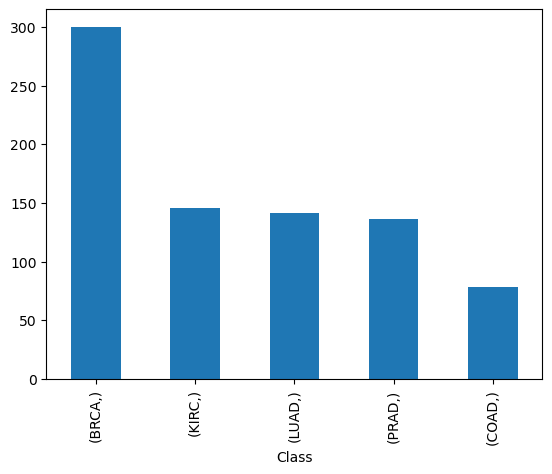

In [21]:
target_variable.value_counts().plot(kind="bar")

### Converting all Categorical variable to the numerical.

In [22]:
categorical_columns = df.select_dtypes(include = ['object', 'category']).columns
categorical_columns

Index(['Sample', 'Class'], dtype='object')

### According to the Information, We have 2 categorical Dataset. 
 - Since Sample Dataset is not giving us any information except the sample number which doesn't carry any values, It is better to drop it. 
 - As we see that the Class Column has 5 types, it is idealto convert it into Numeric for the machine to read.

In [23]:
df = df.drop("Sample", axis=1)

In [24]:
df.head(2)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD


In [25]:
from sklearn.preprocessing import LabelEncoder
y = target_variable.apply(LabelEncoder().fit_transform)
y.head()

,Class
0,4
1,3
2,4
3,4
4,0


### y is a variable that carries the Class

In [26]:
y.value_counts()

Class
0        300
2        146
3        141
4        136
1         78
dtype: int64

### Plot the merged dataset as a hierarchically-clustered heatmap.

In [27]:
df_heatmap = pd.pivot_table(df, index=["Class"]) 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


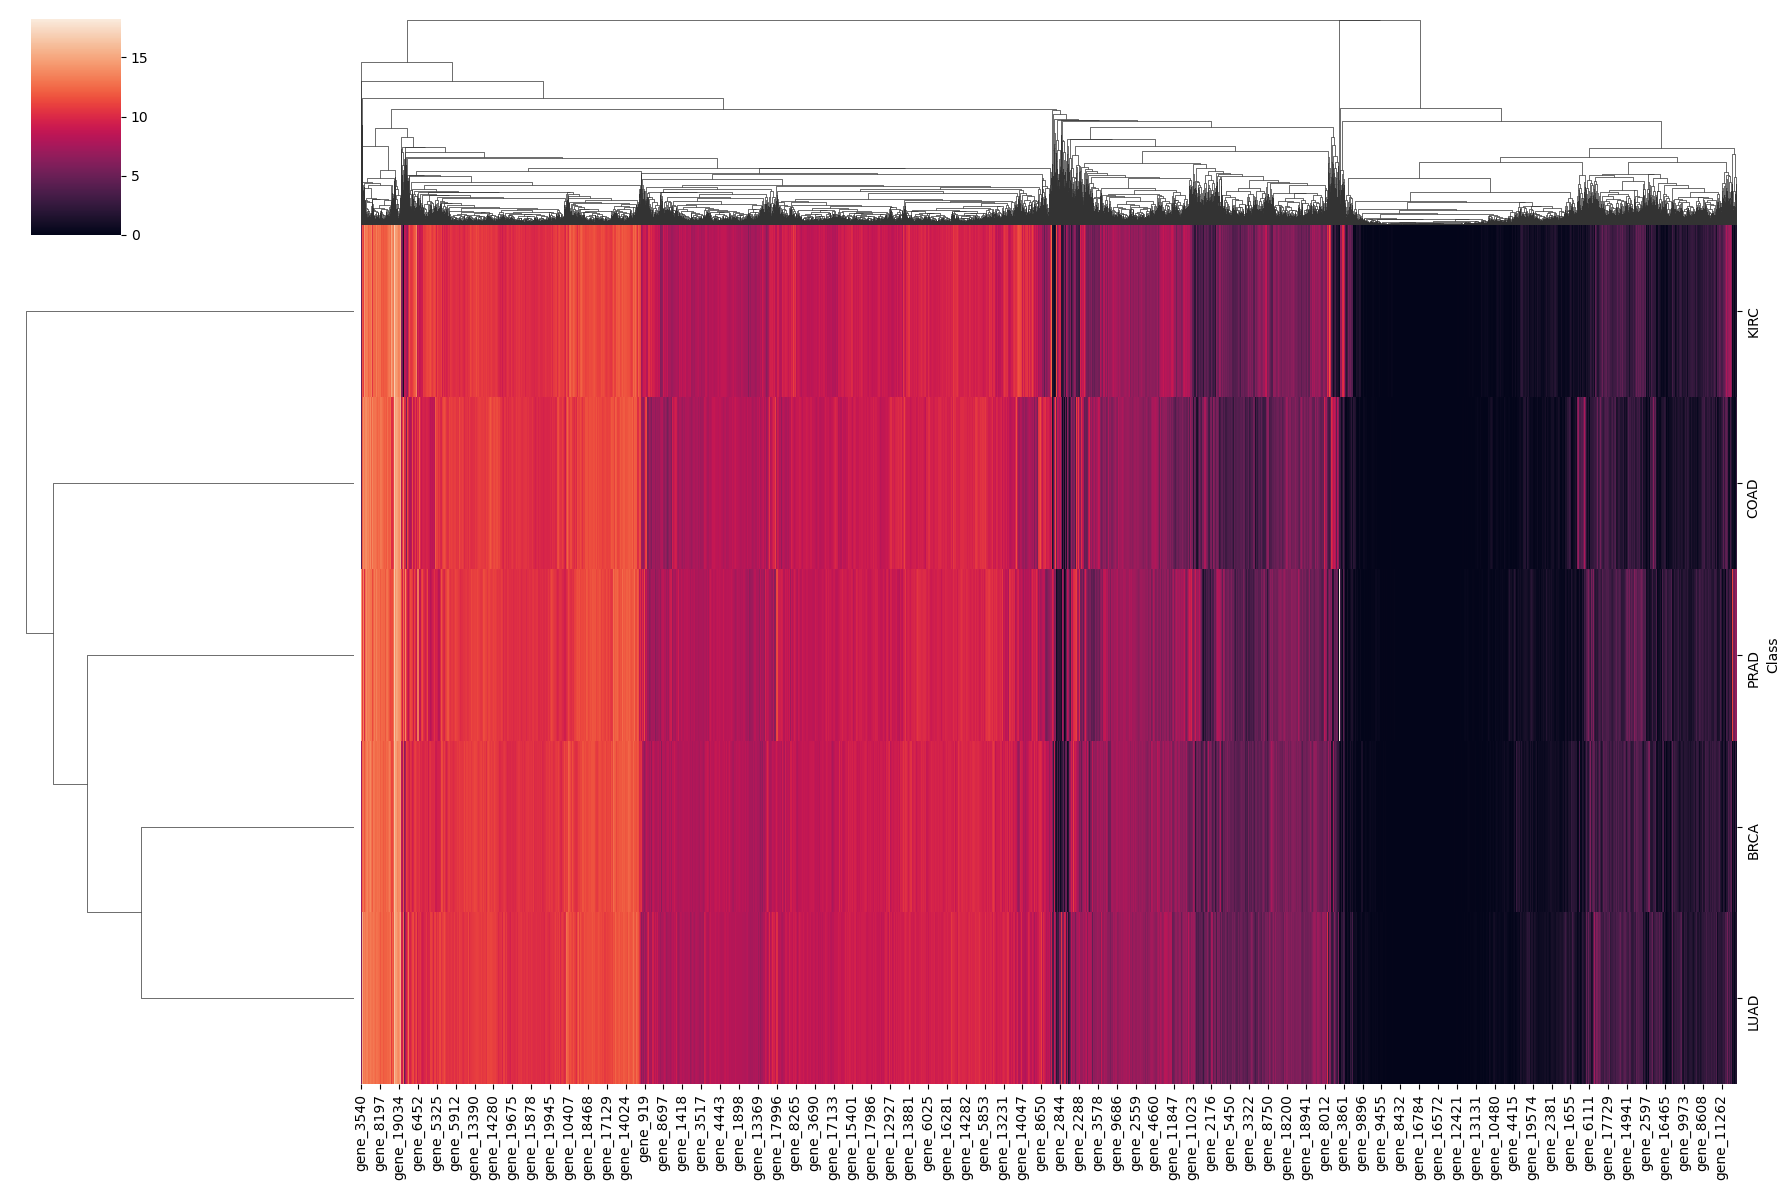

In [28]:
sns.clustermap(df_heatmap, figsize=(18,12))
plt.savefig('clustered_heatmap_with_dendrograms_Seaborn_clustermap_python.jpg',dpi=150)

<Axes: ylabel='Class'>

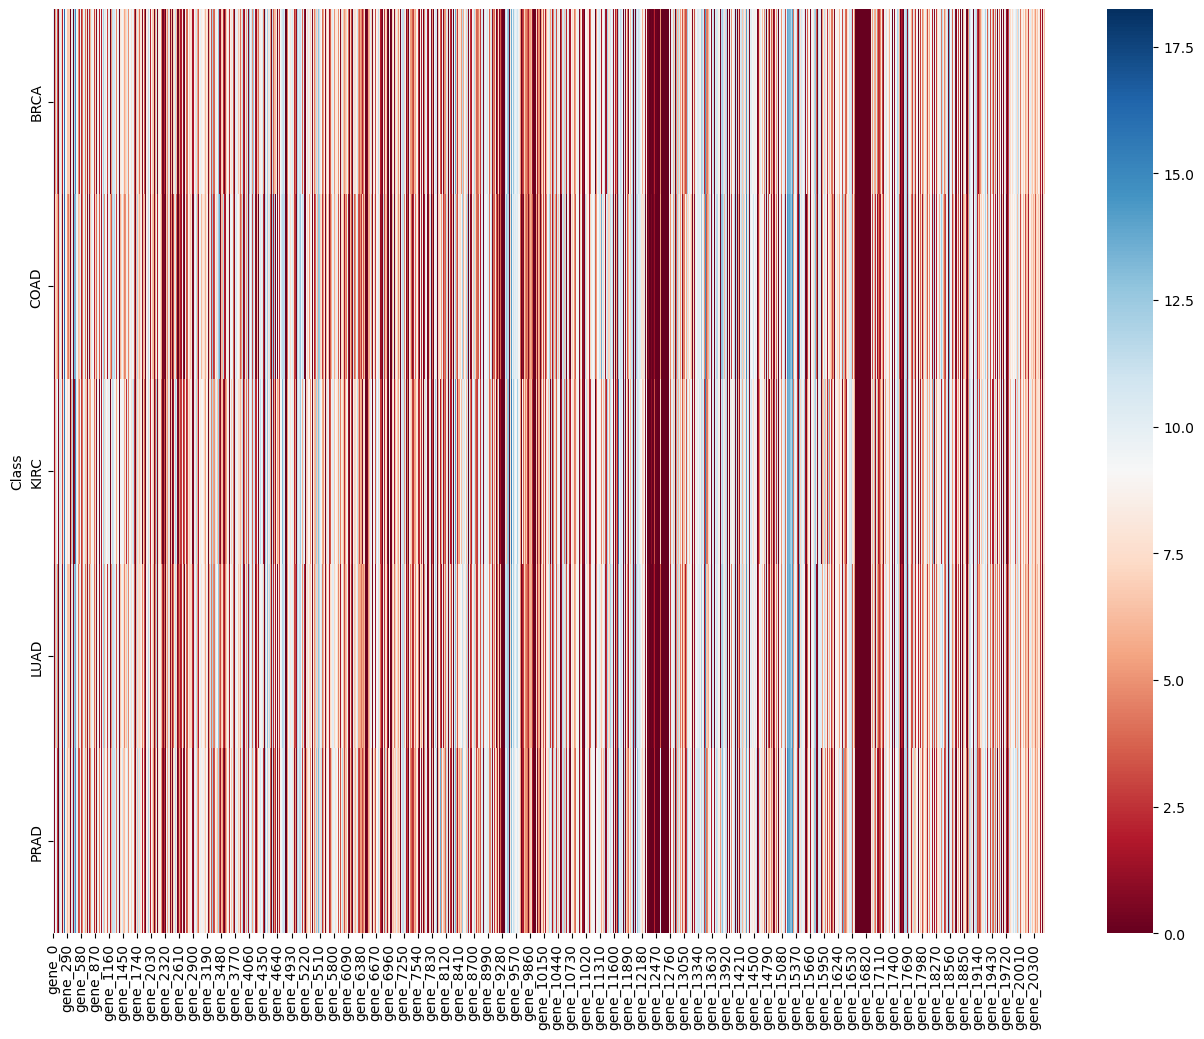

In [29]:
df_mean=df.groupby(["Class"]).mean()
plt.figure(figsize=(16,12))
sns.heatmap(df_mean,cmap="RdBu")


### F test Analysis to perform NULL Hypothesis.


In [30]:
# Assigning a new data set to perform a Null Hypothesis
df_f_test = df

In [31]:
import scipy.stats as stats
def f_test_func (df_f_test, var_to_check):
    """Creating a function that eventually take 2 parameters, 
    genes and its class to see the p-values. Here df_f_test is a daatset and var_to check is 
    just parameters"""
    df_tocheck_anova = df_f_test[[var_to_check, "Class"]]
    """ The primary reason of this function is to check the gene's information to identify the relationship of the 
    gene to cancer type."""
    group_of_cancer = pd.unique(df_tocheck_anova["Class"])
    group_of_cancer
    print("Cancer_Groups:",group_of_cancer)
 
    dic_data = {cancer_type:df_tocheck_anova[var_to_check][df_tocheck_anova.Class==cancer_type].values.ravel()
                 for cancer_type in group_of_cancer}
    # Creating a dictionary to iterate through gene's value and the correspondent cancer_type.
    F_stats,p_value = stats.f_oneway(dic_data['LUAD'], dic_data['PRAD'], dic_data['BRCA'], dic_data['KIRC'], dic_data['COAD'])
    print("P_values", p_value)
    print("F-statistics", F_stats)
    # condition
    if p_value < 0.05:
        print("Reject The Null Hypothesis and declare that There is a statistically significant")
    else:
         print("Accept the Null Hypothesis: We declare Ho: There is insufficient evidence")
        
    return
    
    

In [32]:
f_test_func(df_f_test, "gene_0")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 0.07505540778266195
F-statistics 2.1322967854919392
Accept the Null Hypothesis: We declare Ho: There is insufficient evidence


In [33]:
f_test_func(df_f_test, "gene_9999")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 4.733401031817734e-13
F-statistics 16.569724144934398
Reject The Null Hypothesis and declare that There is a statistically significant


In [36]:
f_test_func(df_f_test, "gene_4")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 1.7436875514223022e-28
F-statistics 37.117862382489406
Reject The Null Hypothesis and declare that There is a statistically significant


In [37]:
f_test_func(df_f_test, "gene_2608")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 3.0137620212676134e-31
F-statistics 40.97068239153789
Reject The Null Hypothesis and declare that There is a statistically significant


In [38]:
f_test_func(df_f_test, "gene_20454")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 8.203411756971568e-52
F-statistics 71.58367085648592
Reject The Null Hypothesis and declare that There is a statistically significant


In [39]:
f_test_func(df_f_test, "gene_2")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 2.1468844023159446e-44
F-statistics 60.1327313546882
Reject The Null Hypothesis and declare that There is a statistically significant


In [40]:
f_test_func(df_f_test, "gene_20")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 2.0966123114581547e-12
F-statistics 15.740339818090204
Reject The Null Hypothesis and declare that There is a statistically significant


In [41]:
f_test_func(df_f_test, "gene_200")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 3.407197018211917e-45
F-statistics 61.34385898065268
Reject The Null Hypothesis and declare that There is a statistically significant


In [42]:
f_test_func(df_f_test, "gene_2000")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 2.1079040819183566e-55
F-statistics 77.30103926851005
Reject The Null Hypothesis and declare that There is a statistically significant


In [43]:
f_test_func(df_f_test, "gene_20000")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 1.23614927542531e-13
F-statistics 17.31965303056122
Reject The Null Hypothesis and declare that There is a statistically significant


In [44]:
f_test_func(df_f_test, "gene_2090")

Cancer_Groups: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
P_values 8.774519816616142e-21
F-statistics 26.669050142893095
Reject The Null Hypothesis and declare that There is a statistically significant


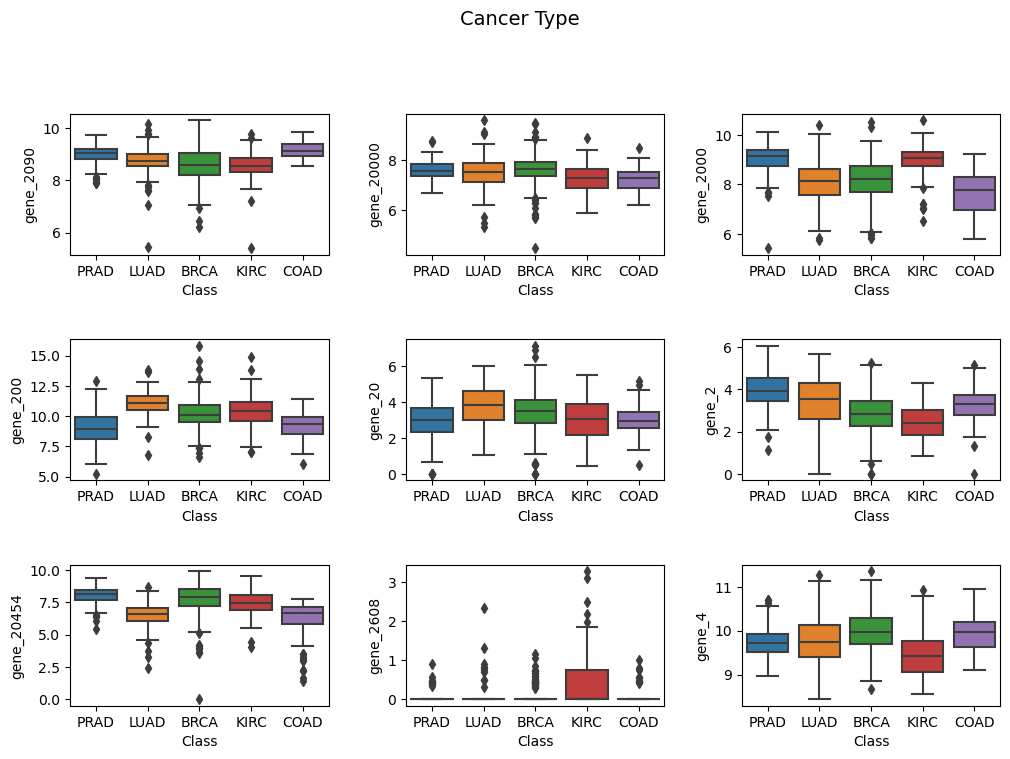

In [45]:

figure, axes = plt.subplots(3, 3, figsize=(12, 8))
figure.suptitle("Cancer Type",fontsize=14)
figure.subplots_adjust(top=0.85, hspace =0.6, wspace=0.3)
row_titles = ["","",""]
column_titles = ["gene_2090", "gene_20000", "gene_2000", "gene_200", "gene_20", "gene_2","gene_20454",
                "gene_2608", "gene_4"]
for i in range(3): # Rows           
    for j in range(3): # Columns
        sns.boxplot(x="Class", y=column_titles[i * 3 + j], data=df, ax=axes[i, j])
        #axes[i, j].set_title(row_titles[i] + f" {column_titles[i * 3 + j]}", size=12)


### Dimensionality Reduction

In [46]:
y.value_counts()

Class
0        300
2        146
3        141
4        136
1         78
dtype: int64

In [47]:
type(y)

pandas.core.frame.DataFrame

In [48]:
type(df)

pandas.core.frame.DataFrame

### Performing PCA

In [49]:
df_pca_data = df.drop("Class", axis=1)
df_pca_data.head(2)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0


In [50]:
df_pca_data.isnull().sum().sort_values(ascending=False).head(5)

gene_0        0
gene_13794    0
gene_13692    0
gene_13691    0
gene_13690    0
dtype: int64

In [51]:
df_pca_data.values.shape

(801, 20531)

In [52]:
x_pca= df_pca_data.values

In [53]:
columns = df_pca_data.columns
# Scaling The data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled_data = sc.fit_transform(x_pca)
X_scaled_data

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

### Principle Component Analysis
 - PCA is a method of dimensionality reduction, PCA reduces the number of features without losing the core information.

In [55]:
from sklearn.decomposition import PCA
pca_995=PCA(0.999)
X_pca_995=pca_995.fit_transform(x_pca)

In [56]:
X_pca_995

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         1.18147808e+00,  3.70537867e-01,  3.22075663e+00],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
        -8.85402842e-02, -3.07161881e-01, -3.16030770e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.60509136e-01,  2.64662031e-01,  3.38399965e-02],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -3.88320048e-01,  3.48124555e-01,  7.09146220e-02],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
        -2.33371077e+00, -4.97478429e-01,  7.05894208e-01],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         8.98804369e-01,  6.39618300e-01, -7.04701501e-01]])

In [57]:
df_995 = pd.DataFrame(X_pca_995)
df_995['Cancer_Group']=y['Class']
df_995

,0,1,2,3,4,5,6,7,8,9,...,779,780,781,782,783,784,785,786,787,Cancer_Group
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-0.310236,-0.686585,0.476544,2.779959,0.146359,1.556762,1.181478,0.370538,3.220757,4
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,-0.694702,0.621340,-0.689401,0.441203,0.513851,0.539447,-0.088540,-0.307162,-0.316031,3
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.089770,0.084442,0.348433,-0.223615,-0.448872,-0.109892,0.160509,0.264662,0.033840,4
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.580689,1.778296,-1.825590,0.458204,-0.935239,0.450115,-0.087884,0.911553,0.549662,4
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,-0.350494,-0.618314,-2.019707,1.890074,-1.651475,-0.825343,-0.588552,-1.145270,2.576034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.754475,-2.630520,0.879762,-0.036217,-0.270813,1.012485,1.767497,-1.607538,0.051784,0
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,0.383108,0.161578,-0.123763,0.597275,0.098750,-0.040773,-0.312792,1.021692,0.099857,3
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,-0.107220,-0.541187,0.344215,-0.499027,-0.018519,0.436123,-0.388320,0.348125,0.070915,1
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,-3.511605,0.727211,0.887290,-2.320906,-0.769510,-0.360186,-2.333711,-0.497478,0.705894,4


<Axes: xlabel='0', ylabel='1'>

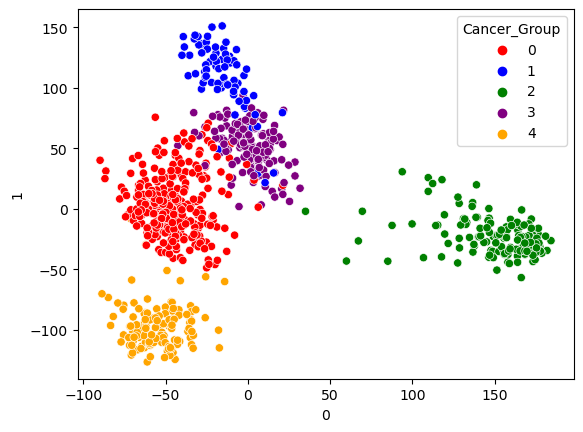

In [58]:
custom_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
sns.scatterplot(x=0,y=1, hue = 'Cancer_Group',data=df_995, palette=custom_palette)

In [59]:
from sklearn.decomposition import PCA
pca_2=PCA(n_components=2)
X_pca_2=pca_2.fit_transform(X_scaled_data)
X_pca_2.shape

(801, 2)

In [60]:
X_pca_2

array([[-57.44698694,  95.41098083],
       [-16.91943008,   0.73247019],
       [-70.34521784, -19.30332672],
       ...,
       [ -4.13308964,  15.69001413],
       [-30.81475746,  33.52642257],
       [-22.34455667,   4.0523563 ]])

In [61]:
df_pca_2 = pd.DataFrame(X_pca_2)
df_pca_2.columns = ["Gene-PCA1","Gene-PCA2"]
df_pca_2["Cancer_Group"] = y["Class"]
df_pca_2

,Gene-PCA1,Gene-PCA2,Cancer_Group
0,-57.446987,95.410981,4
1,-16.919430,0.732470,3
2,-70.345218,-19.303327,4
3,-49.161591,-9.227586,4
4,-18.132534,-51.327797,0
...,...,...,...
796,-12.417385,-42.321574,0
797,-29.415554,28.526281,3
798,-4.133090,15.690014,1
799,-30.814757,33.526423,4


<Axes: xlabel='Gene-PCA1', ylabel='Gene-PCA2'>

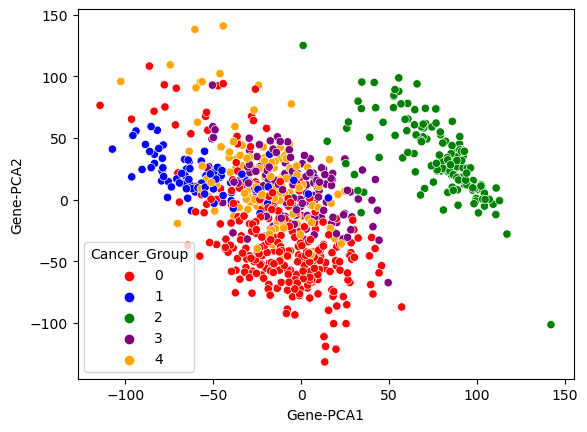

In [62]:
custom_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
sns.scatterplot(x="Gene-PCA1",y="Gene-PCA2", hue = 'Cancer_Group',data=df_pca_2, palette=custom_palette)

### Clusters position has changed with N_compenents value changed.

#### Using LDA Method

In [63]:
df.lda = df.drop(["Class"], axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_8708\1615406510.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.lda = df.drop(["Class"], axis=1)


In [64]:
df.lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_lda = lda.fit(df.lda, y).transform(df.lda)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [67]:
X_lda

array([[ -7.95812499, -10.92281806],
       [ -0.30156342,   2.78089773],
       [ -6.42495151,  -8.87097786],
       ...,
       [ -1.42667399,   0.47451391],
       [ -7.80064115, -12.10433664],
       [ -7.30631211,  -7.38847589]])

In [68]:
data_lda = pd.DataFrame(data = X_lda)
data_lda

,0,1
0,-7.958125,-10.922818
1,-0.301563,2.780898
2,-6.424952,-8.870978
3,-6.934259,-10.417199
4,-2.872004,4.912284
...,...,...
796,-2.491183,6.516482
797,0.217789,1.859410
798,-1.426674,0.474514
799,-7.800641,-12.104337


In [69]:
y_data=y

In [70]:
data_lda["Cancer_Group"] = y_data["Class"]
data_lda

,0,1,Cancer_Group
0,-7.958125,-10.922818,4
1,-0.301563,2.780898,3
2,-6.424952,-8.870978,4
3,-6.934259,-10.417199,4
4,-2.872004,4.912284,0
...,...,...,...
796,-2.491183,6.516482,0
797,0.217789,1.859410,3
798,-1.426674,0.474514,1
799,-7.800641,-12.104337,4


<Axes: xlabel='0', ylabel='1'>

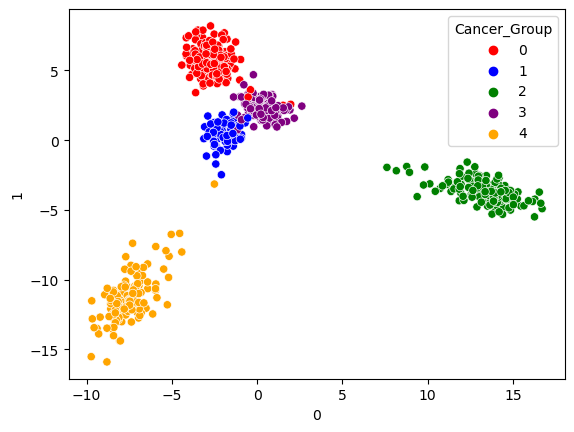

In [71]:
custom_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
sns.scatterplot(x=0,y=1, hue = 'Cancer_Group',data=data_lda, palette=custom_palette)

### TSNE 

In [72]:
from sklearn.manifold import TSNE
ts= TSNE(learning_rate=200)

In [73]:
ts_data = df.lda
ts_data_features = ts.fit_transform(ts_data)

In [74]:
ts_data_features[1:4,:]

array([[  9.674863,  26.0691  ],
       [-37.50547 ,  -6.310991],
       [-38.526474,  -6.460291]], dtype=float32)

In [75]:
ts_data["Cancer_Group"]= y_data["Class"]

In [76]:
ts_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Cancer_Group
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,4
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,3
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,4
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,4
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,0
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,3
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,1
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,4


<Axes: >

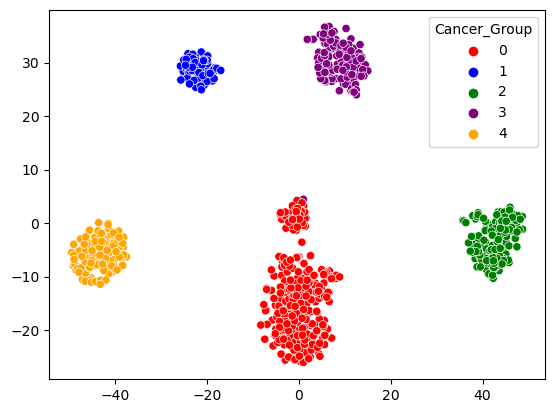

In [77]:
custom_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
sns.scatterplot(x=ts_data_features[:,0],y=ts_data_features[:,1], hue = 'Cancer_Group',data=ts_data, palette=custom_palette)


### K-Means Clustering

#### Genes whose expression values are similar across all samples

Our goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g. k-means, hierarchical and mean shift clustering, to genes and samples.
K-means clustering is the most famous partitioning clustering algorithm, and its simplicity and efficiency make it the most widely used of all clustering algorithms. The k-means clustering algorithm (k-means clustering algorithm) is a cluster analysis algorithm for iterative solution

In [78]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=5) #default number of initialization, i.2 10 and can be changed.
km.fit(X_pca_995)
km.labels_
print("Labels:",km.labels_[:20])

Labels: [0 4 0 0 3 0 1 0 3 0 3 1 0 3 3 3 4 1 1 0]


In [79]:
type(X_pca_995)

numpy.ndarray

In [80]:
x_coordinates = X_pca_995[:,0]
y_coordinates = X_pca_995[:,1]

C:\Users\HP\AppData\Local\Temp\ipykernel_8708\1932353521.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca_995[:,0],y=X_pca_995[:,1],palette=custom_palette)


<Axes: >

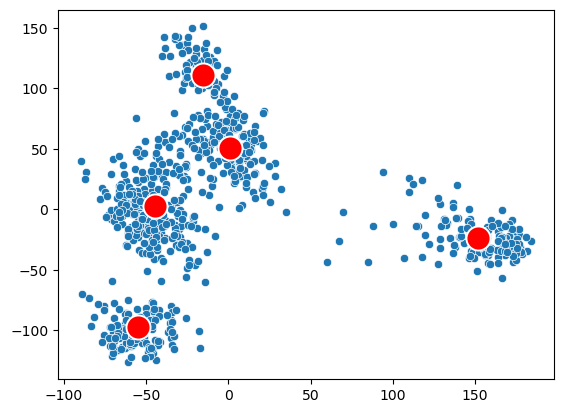

In [81]:

k_means = KMeans(n_clusters=5, init="k-means++", max_iter=500, n_init=10, random_state=42)
pred_y = k_means.fit_predict(X_pca_995)
sns.scatterplot(x=X_pca_995[:,0],y=X_pca_995[:,1],palette=custom_palette)
sns.scatterplot(x=k_means.cluster_centers_[:,0],y=k_means.cluster_centers_[:,1],s=300, c="red")



In [82]:
k_means.cluster_centers_

array([[ 1.51447207e+02, -2.32883220e+01, -4.93463661e+00, ...,
         8.70962846e-03,  1.14635540e-03,  1.84846805e-03],
       [-5.45469234e+01, -9.73593416e+01,  7.32817223e+01, ...,
         3.17973559e-03, -1.97569577e-03,  7.89239227e-03],
       [-1.55940642e+01,  1.11316332e+02,  9.20068112e+01, ...,
         3.14022351e-03, -8.32974395e-03,  1.89209652e-03],
       [-4.47629413e+01,  2.92172901e+00, -5.98619764e+01, ...,
         6.07667563e-04,  1.16420263e-03, -2.33977864e-03],
       [ 1.26019697e+00,  5.08082084e+01,  1.23617055e+01, ...,
        -1.50400921e-02,  2.78208638e-03, -5.53525886e-03]])

In [83]:
from sklearn.cluster import KMeans
km_2 = KMeans(n_clusters=5)
km_2.fit(X_pca_2)
km_2.labels_
print("Labels:",km_2.labels_[:30])

Labels: [3 1 4 4 2 1 0 1 2 4 1 0 1 3 2 2 1 0 0 4 2 1 1 4 0 1 4 2 1 2]


<Axes: >

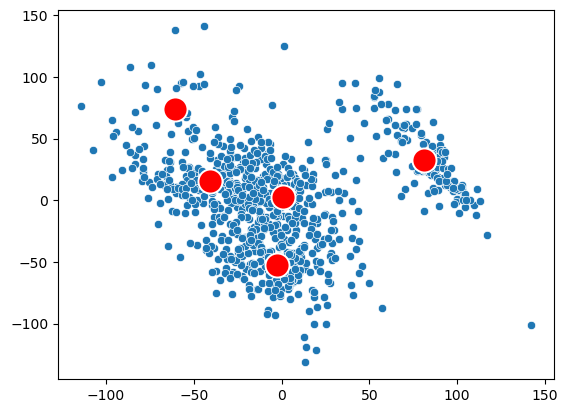

In [84]:
k_means_2 = KMeans(n_clusters=5, init="k-means++", max_iter=500, n_init=10, random_state=42)
pred_y = k_means_2.fit_predict(X_pca_2)
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1])
sns.scatterplot(x=k_means_2.cluster_centers_[:,0],y=k_means_2.cluster_centers_[:,1],s=300, c="red")

In [85]:
k_means_2.cluster_centers_

array([[ -2.42319618, -52.57122395],
       [  0.81856725,   2.81720482],
       [ 80.93171919,  32.80898518],
       [-60.80310887,  73.86530527],
       [-40.98889042,  15.78561855]])

In [86]:
X_pca_2.shape

(801, 2)

In [87]:
cluster_pca_2_df = pd.DataFrame(data=X_pca_2,columns =["Gene-PCA1","Gene-PCA2"])
cluster_pca_2_df["Labels"]=km_2.labels_
cluster_pca_2_df["Cancer_Type"] =target_variable.values
cluster_pca_2_df

,Gene-PCA1,Gene-PCA2,Labels,Cancer_Type
0,-57.446987,95.410981,3,PRAD
1,-16.919430,0.732470,1,LUAD
2,-70.345218,-19.303327,4,PRAD
3,-49.161591,-9.227586,4,PRAD
4,-18.132534,-51.327797,2,BRCA
...,...,...,...,...
796,-12.417385,-42.321574,2,BRCA
797,-29.415554,28.526281,4,LUAD
798,-4.133090,15.690014,1,COAD
799,-30.814757,33.526423,4,PRAD


In [88]:
cancer_types = ['BRCA', 'LUAD', 'COAD', 'PRAD', 'KIRC']
for cancer_type in cancer_types:
    cancer_data = cluster_pca_2_df.groupby('Cancer_Type').get_group(cancer_type)
    label_counts = cancer_data['Labels'].value_counts()
    print(f'Cancer Type: {cancer_type}')
    print(label_counts)

Cancer Type: BRCA
2    202
1     44
4     35
3     19
Name: Labels, dtype: int64
Cancer Type: LUAD
1    99
4    23
2    13
3     5
0     1
Name: Labels, dtype: int64
Cancer Type: COAD
4    61
3     9
1     8
Name: Labels, dtype: int64
Cancer Type: PRAD
1    60
4    46
2    17
3    13
Name: Labels, dtype: int64
Cancer Type: KIRC
0    138
1      7
3      1
Name: Labels, dtype: int64


### K-Means Clustering with 995

In [89]:
X_pca_995

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         1.18147808e+00,  3.70537867e-01,  3.22075663e+00],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
        -8.85402842e-02, -3.07161881e-01, -3.16030770e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.60509136e-01,  2.64662031e-01,  3.38399965e-02],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -3.88320048e-01,  3.48124555e-01,  7.09146220e-02],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
        -2.33371077e+00, -4.97478429e-01,  7.05894208e-01],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         8.98804369e-01,  6.39618300e-01, -7.04701501e-01]])

In [90]:
cluster_995_df = pd.DataFrame(data=X_pca_995)
cluster_995_df["Labels_995"]=km.labels_
cluster_995_df["Cancer_Type_995"] =target_variable.values
cluster_995_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,780,781,782,783,784,785,786,787,Labels_995,Cancer_Type_995
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-0.686585,0.476544,2.779959,0.146359,1.556762,1.181478,0.370538,3.220757,0,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.621340,-0.689401,0.441203,0.513851,0.539447,-0.088540,-0.307162,-0.316031,4,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.084442,0.348433,-0.223615,-0.448872,-0.109892,0.160509,0.264662,0.033840,0,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,1.778296,-1.825590,0.458204,-0.935239,0.450115,-0.087884,0.911553,0.549662,0,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,-0.618314,-2.019707,1.890074,-1.651475,-0.825343,-0.588552,-1.145270,2.576034,3,BRCA


In [91]:
cancer_types_995 = ['BRCA', 'LUAD', 'COAD', 'PRAD', 'KIRC']
for cancer_type in cancer_types_995:
    cancer_data = cluster_995_df.groupby('Cancer_Type_995').get_group(cancer_type)
    label_counts = cancer_data['Labels_995'].value_counts()
    print(f'Cancer Type: {cancer_type}')
    print(label_counts)

Cancer Type: BRCA
3    299
4      1
Name: Labels_995, dtype: int64
Cancer Type: LUAD
4    139
3      2
Name: Labels_995, dtype: int64
Cancer Type: COAD
2    77
4     1
Name: Labels_995, dtype: int64
Cancer Type: PRAD
0    136
Name: Labels_995, dtype: int64
Cancer Type: KIRC
1    145
3      1
Name: Labels_995, dtype: int64


### Hierarchical Clustering

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(suppress=True)
Z=linkage(X_pca_995, "ward")

In [93]:
print(Z)

[[ 499.          565.           87.98221335    2.        ]
 [ 674.          714.           88.4477487     2.        ]
 [ 258.          477.           94.74457239    2.        ]
 ...
 [1596.         1597.         2217.05379469  519.        ]
 [1591.         1598.         2365.53298339  655.        ]
 [1593.         1599.         2909.27336455  801.        ]]


The linkage matrix contains the history of which data points were merged into which cluster during each iteration. If n is no.of samples,there are n-1 rows. Each row in the matrix has four columns. the first two columns are either data points or cluster labels that are being merged, the third column is the cluster distance between the first two column values, and the last column is the total number of data points in the cluster once the merge is complete.



In [94]:
Z.shape

(800, 4)

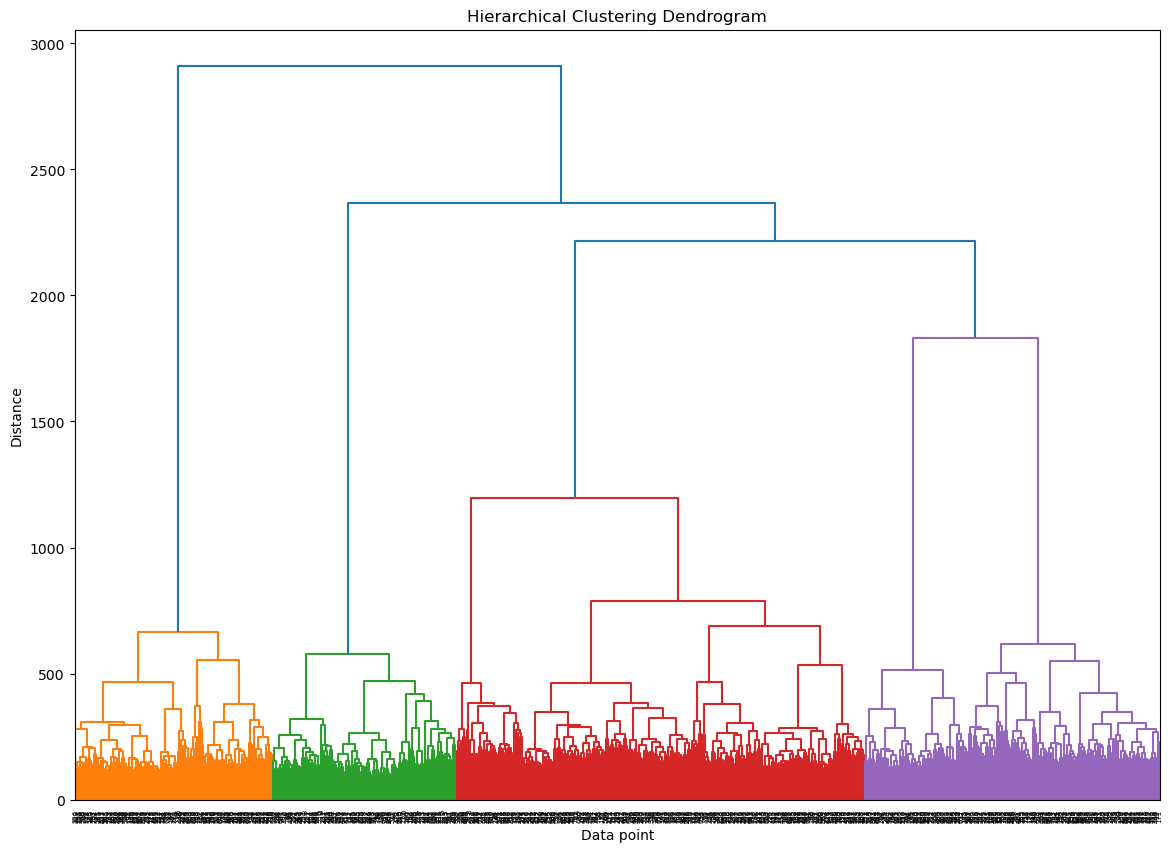

In [95]:

plt.figure(figsize=(14, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k')
plt.show() 


### Clustering Analysis for the Genes

In [96]:
df_cluster = df

In [97]:
df_cluster=df_cluster.drop("Class", axis=1)

In [98]:
df_cluster.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [99]:
df_cluster=df_cluster.T
df_cluster

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
gene_1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
gene_2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
gene_3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
gene_20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
gene_20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794
gene_20529,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,4.759151,...,7.313500,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716


In [100]:
Z_1=linkage(df_cluster, "ward")
print(Z_1)

[[    5.            23.             0.             2.        ]
 [ 4370.         20531.             0.             3.        ]
 [ 4808.         20532.             0.             4.        ]
 ...
 [41049.         41055.          3992.9859227   7274.        ]
 [41056.         41058.          7988.01683275 14332.        ]
 [41057.         41059.         19069.11081148 20531.        ]]


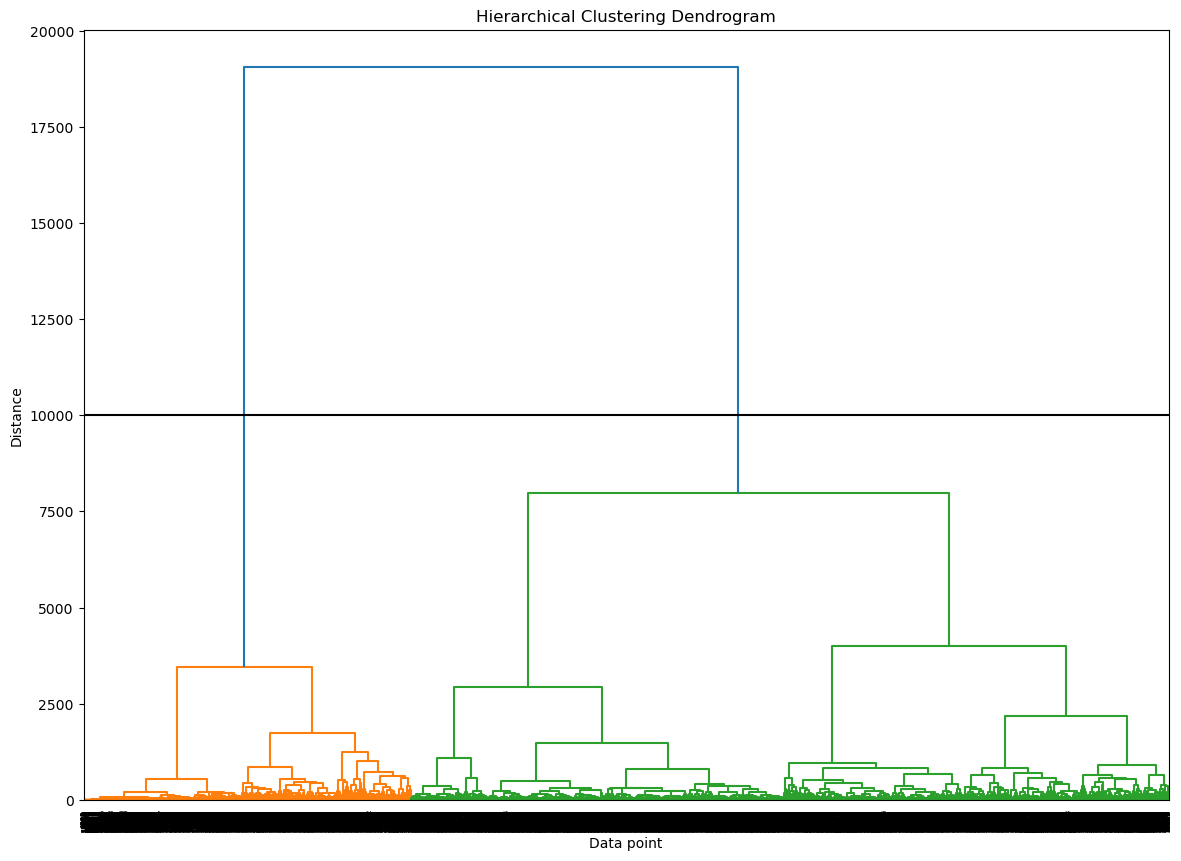

In [101]:
plt.figure(figsize=(14, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z_1)
plt.axhline(y=10000, c='k')
plt.show() 

In [102]:
from scipy.cluster.hierarchy import fcluster
max_dist=10000
clus_heir = fcluster(Z_1, max_dist, criterion="distance")
np.unique(clus_heir)

array([1, 2], dtype=int32)

In [103]:
df_cluster["Cluster_Check"] = clus_heir

<Axes: >

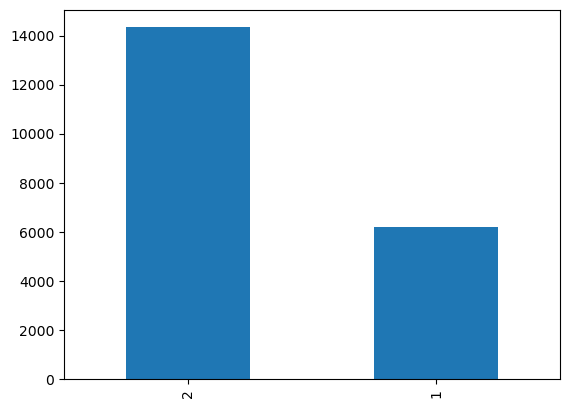

In [104]:
df_cluster["Cluster_Check"].value_counts().plot(kind="bar")

In [105]:
y_data =df_cluster["Cluster_Check"]

In [106]:
df_cluster=df_cluster.drop("Cluster_Check", axis=1)

In [107]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df = pca.fit_transform(df_cluster)


In [108]:
clus_heir

array([1, 1, 1, ..., 2, 2, 1], dtype=int32)

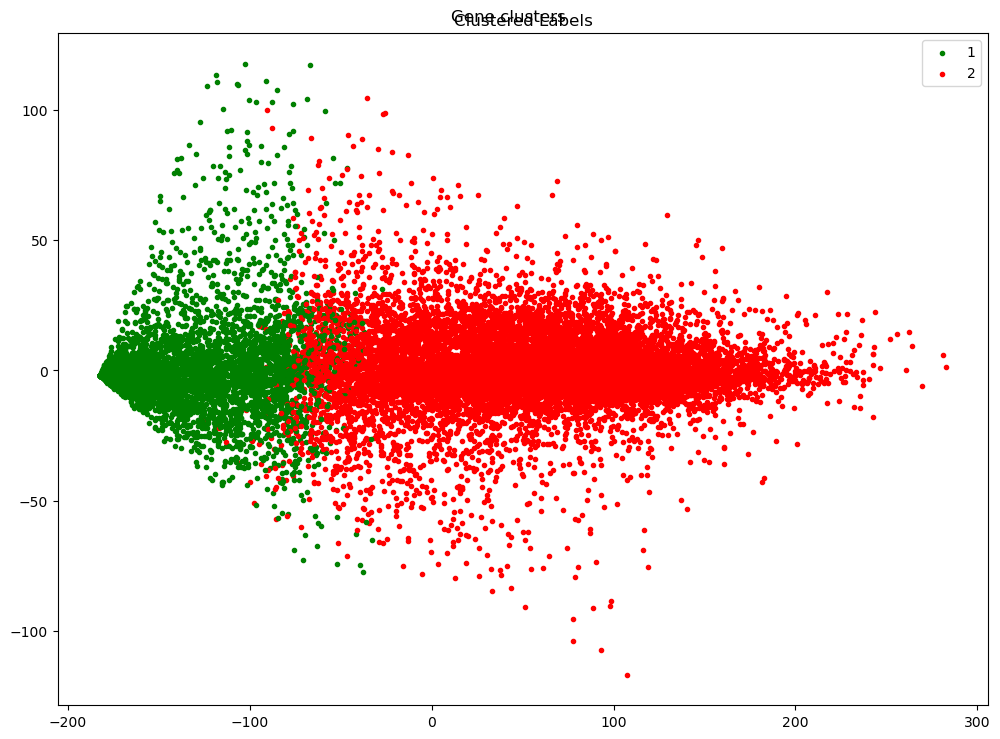

In [109]:
figure, axis = plt.subplots(1, 1, figsize=(12, 8))
figure.suptitle('Gene clusters')
figure.subplots_adjust(top=0.95, wspace=0.7)
axis.set_title('Clustered Labels')
for i in range(len(y_data)):
  if clus_heir[i] == 1:
    a1 = axis.scatter(pca_df[i,0], pca_df[i,1],c='g', marker='.')
  if clus_heir[i] == 2:
    a2 = axis.scatter(pca_df[i,0], pca_df[i,1],c='r', marker='.') 
  
l1 = axis.legend([a1, a2], ['1','2'])



C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


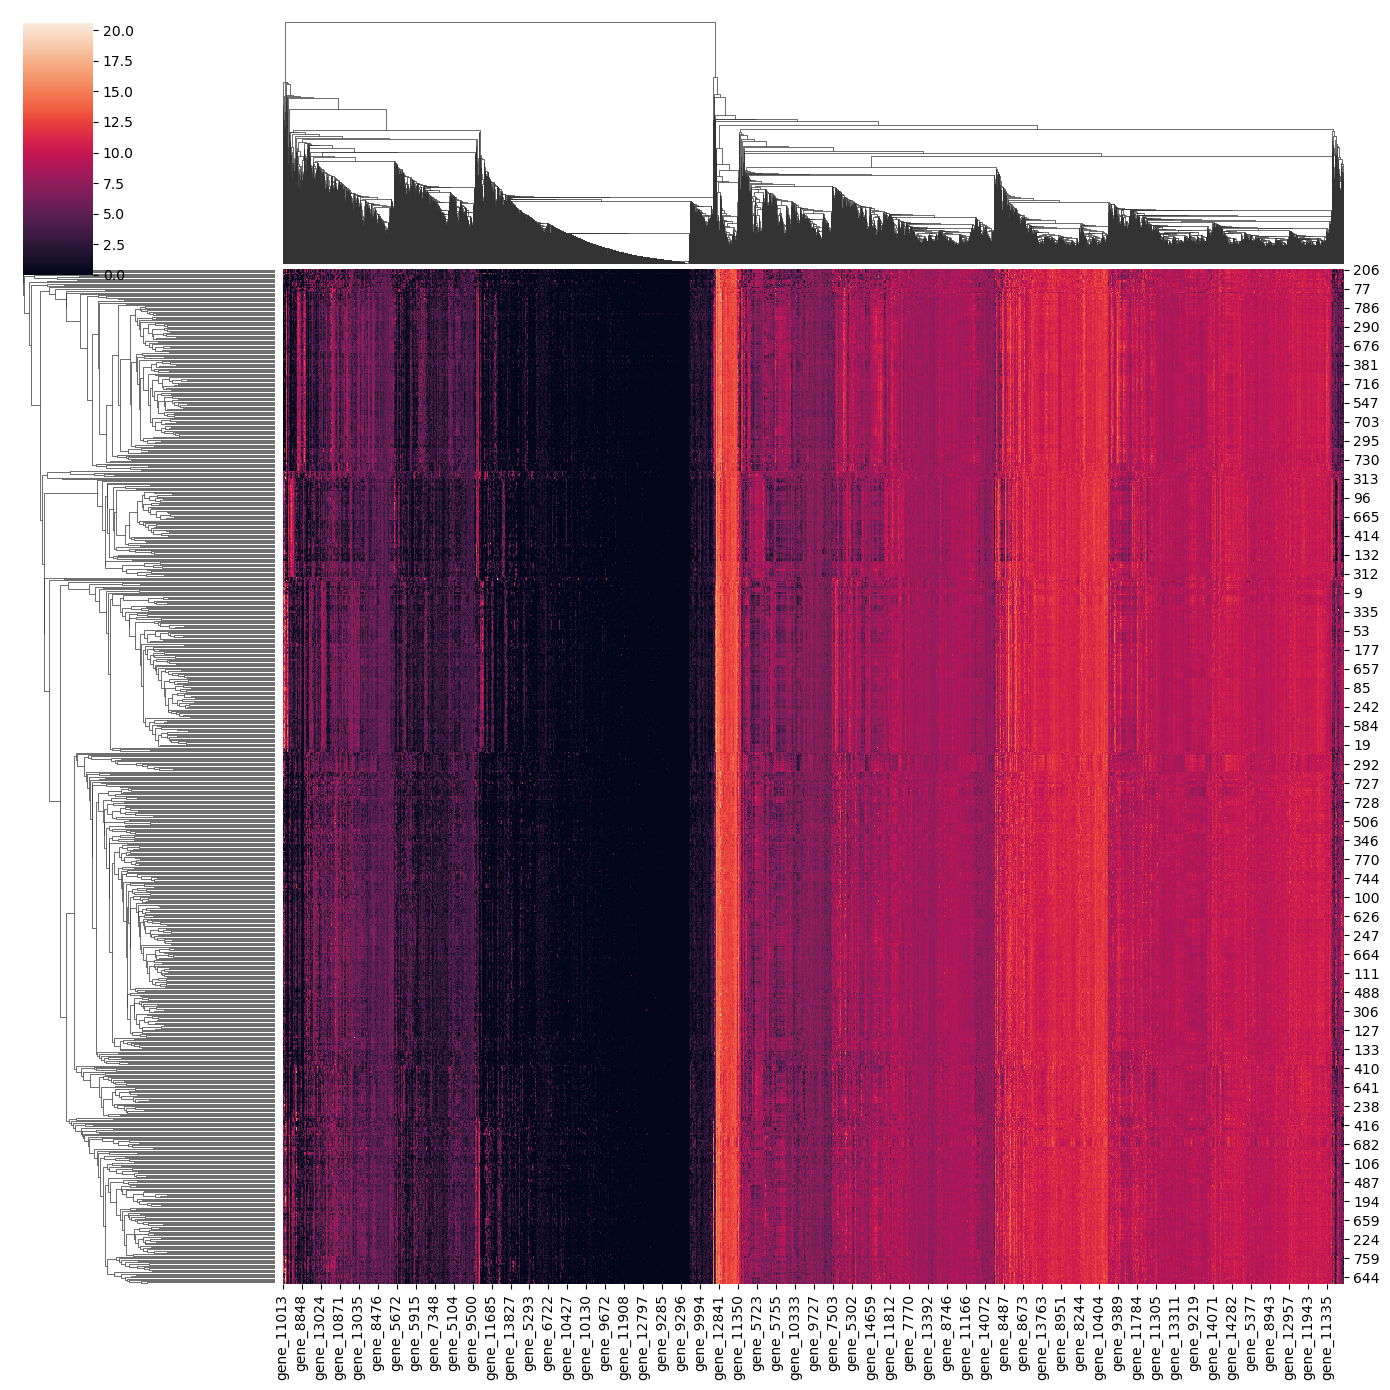

In [110]:
sns.clustermap(df.iloc[:,5000:15000], figsize=(14,14))

### BUilding Classification Models

Our goal is to identify groups of genes that behave similarly across samples and identify the sample distributions that correspond to each cancer type.

#### 1) Decision tree classifier


In [112]:
x_data = df.lda.drop(["Cancer_Group"],axis=1)

In [113]:
x_data.head(4)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0


In [114]:
x_data.shape

(801, 20531)

In [115]:
y_data = df.lda["Cancer_Group"]
y_data

0      4
1      3
2      4
3      4
4      0
      ..
796    0
797    3
798    1
799    4
800    4
Name: Cancer_Group, Length: 801, dtype: int32

In [117]:
y_data.shape

(801,)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

In [119]:
y_test.shape

(201,)

In [120]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
accuracy = dt.score(X_test,y_test)
print(f"Accuracy on the testing set: {accuracy:.2f}")

Accuracy on the testing set: 1.00


In [121]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[80  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 31  0  0]
 [ 0  0  0 35  0]
 [ 1  0  0  0 33]]


In [122]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        35
           4       1.00      0.97      0.99        34

    accuracy                           1.00       201
   macro avg       1.00      0.99      1.00       201
weighted avg       1.00      1.00      1.00       201



In [123]:
dt.score(X_test,y_test)

0.9950248756218906

### SVM
Support vector machines (SVMs) is a binary classification model. Its basic model is a linear classifier with the largest interval defined in the feature space

#### X_pca is file that is saved when we performed the PCA. It containes 95% of the valuable information from the Database

In [124]:
x_pca

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [128]:
y_pca = np.array(y).reshape(-1)
y_pca[:10]

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4])

In [129]:
y_label=df[["Class"]]

In [130]:
y_label.value_counts()

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

In [ ]:
# y = y_label.apply(LabelEncoder().fit_transform)
# y = np.array(y).reshape(-1)

In [131]:
X_train, X_test, y_train, y_test  = train_test_split(x_pca, y_pca, test_size = 0.2, random_state = 42)

In [132]:
print(X_train.shape)
print(type(X_train))
print(X_test.shape)
print(type(X_test))

print(y_train.shape)
print(type(y_train))
print(y_test.shape)
print(type(y_test))

(640, 20531)
<class 'numpy.ndarray'>
(161, 20531)
<class 'numpy.ndarray'>
(640,)
<class 'numpy.ndarray'>
(161,)
<class 'numpy.ndarray'>


In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
param_grid = {
    "kernel": ["linear", "rbf"],
    "gamma" :[1e-02, 1e-05],
    "C": [1,10,30,70,100]
}
sv_cl = GridSearchCV(SVC(random_state=42), param_grid,cv=5,scoring="accuracy")
sv_cl.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10, 30, 70, 100], 'gamma': [0.01, 1e-05],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [134]:
print("Hyperparameter tuning results for accuracy:\n")
for mean_score, params in zip(sv_cl.cv_results_['mean_test_score'], sv_cl.cv_results_['params']):
    print(f"Accuracy: {mean_score:.5f} for parameters: {params}")
print(f"\nBest parameters found: {sv_cl.best_params_}")
print(f"Best model validation accuracy: {sv_cl.best_score_:.4f}")

Hyperparameter tuning results for accuracy:

Accuracy: 0.99844 for parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.37344 for parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.99844 for parameters: {'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}
Accuracy: 0.99531 for parameters: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
Accuracy: 0.99844 for parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.37344 for parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.99844 for parameters: {'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}
Accuracy: 0.99687 for parameters: {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
Accuracy: 0.99844 for parameters: {'C': 30, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.37344 for parameters: {'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.99844 for parameters: {'C': 30, 'gamma': 1e-05, 'kernel': 'linear'}
Accuracy: 0.99687 for parameters: {'C': 30, 'gamma': 1e-05, 'kernel': 'rbf'}
Accuracy: 0.99844 for p

#### Test Data Performance

In [135]:
gred_se = sv_cl.best_estimator_
y_pred = gred_se.predict(X_test)

In [136]:
y_pred[:20]

array([3, 0, 3, 2, 0, 0, 0, 1, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3])

In [138]:
y_pred.shape

(161,)

In [137]:
y_test[:20]

array([3, 0, 3, 2, 0, 0, 0, 1, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3])

In [139]:
y_test.shape

(161,)

In [140]:
print("test accuracy for SVM \n", classification_report(y_pred,y_test))
print("Confusion matrix for SVM \n", confusion_matrix(y_pred,y_test))

test accuracy for SVM 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Confusion matrix for SVM 
 [[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]


### Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100,200,500],
    "max_features" :['auto', 'sqrt', 'log2'],
}
random_for = RandomForestClassifier(random_state=42)
grid_s = GridSearchCV(random_for, param_grid, cv=5, scoring="accuracy")
grid_s.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [142]:
grid_s.best_params_

{'max_features': 'log2', 'n_estimators': 200}

In [143]:
best_est = grid_s.best_estimator_

In [144]:
from sklearn.model_selection import cross_val_predict
y_pred_rf = cross_val_predict(best_est ,X_train,y_train,cv=5)
print("Accuracy score:\n", accuracy_score(y_train,y_pred_rf))
print("Classification report:\n", classification_report(y_train,y_pred_rf))
     

Accuracy score:
 0.996875
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       239
           1       1.00      1.00      1.00        61
           2       1.00      0.99      1.00       121
           3       1.00      0.99      1.00       112
           4       1.00      1.00      1.00       107

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



In [145]:
print("confusion matrix for train data \n", confusion_matrix(y_train,y_pred_rf))

confusion matrix for train data 
 [[239   0   0   0   0]
 [  0  61   0   0   0]
 [  1   0 120   0   0]
 [  1   0   0 111   0]
 [  0   0   0   0 107]]


In [146]:
y_pred_test = best_est.predict(X_test)

In [147]:
y_pred_test.shape

(161,)

In [148]:
print("test accuracy for RandomForest \n", classification_report(y_pred_test,y_test))
print("Confusion matrix for RandomForest \n", confusion_matrix(y_pred_test,y_test))

test accuracy for RandomForest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Confusion matrix for RandomForest 
 [[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]


In [149]:
y_test.shape

(161,)

### Naive Bayes Classifier

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create and fit GridSearchCV
nb_clf = GaussianNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_nb_clf = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_nb_clf.score(X_test, y_test)
print("Best model accuracy:", accuracy)


Best model accuracy: 0.9875776397515528


In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Vary the number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Choose between uniform and distance-based weights
    'p': [1, 2]  # Use Manhattan (p=1) or Euclidean (p=2) distance
}

# Create and fit GridSearchCV
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_knn_clf = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_knn_clf.score(X_test, y_test)
print("Best model accuracy:", accuracy)


Best model accuracy: 1.0


### Deep Neural Network

In [255]:
X_data=df.drop(["Class"], axis=1)
X_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [256]:
X = X_data.values
X.shape

(801, 20531)

In [257]:
y_data=df["Class"]
y1 =pd.get_dummies(y_data)
y1

,BRCA,COAD,KIRC,LUAD,PRAD
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
796,1,0,0,0,0
797,0,0,0,1,0
798,0,1,0,0,0
799,0,0,0,0,1


In [258]:
# y = y_label.apply(LabelEncoder().fit_transform)
# y = np.array(y).reshape(-1)

In [259]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y1, test_size=0.2, random_state=42)

In [279]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape 

((640, 20531), (161, 20531), (640, 5), (161, 5))

In [261]:
import tensorflow as tf
model = tf.keras.models.Sequential()
hidden_layers = [5000, 2000, 1000, 500, 200, 100]
model.add(tf.keras.layers.Dense(hidden_layers[0], input_dim=20531, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
for neurons in hidden_layers[1:]:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [262]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5000)              102660000 
                                                                 
 batch_normalization_6 (Bat  (None, 5000)              20000     
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 2000)              10002000  
                                                                 
 dense_44 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_45 (Dense)            (None, 500)               500500    
                                                                 
 dense_46 (Dense)            (None, 200)               100200    
                                                      

In [263]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
     

In [270]:
history = model.fit(X_train, y_train,
        validation_data = (X_test, y_test),
         epochs= 5, batch_size=32)

Epoch 1/5
20/20 [==============================] - 40s 2s/step - loss: 4.4784e-04 - accuracy: 1.0000 - val_loss: 0.1403 - val_accuracy: 0.9441
Epoch 2/5
20/20 [==============================] - 33s 2s/step - loss: 0.0473 - accuracy: 0.9984 - val_loss: 0.0142 - val_accuracy: 0.9938
Epoch 3/5
20/20 [==============================] - 34s 2s/step - loss: 4.4040e-05 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9938
Epoch 4/5
20/20 [==============================] - 34s 2s/step - loss: 3.5736e-05 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9938
Epoch 5/5
20/20 [==============================] - 32s 2s/step - loss: 1.9556e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000


In [271]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


Text(0, 0.5, 'Accuracy')

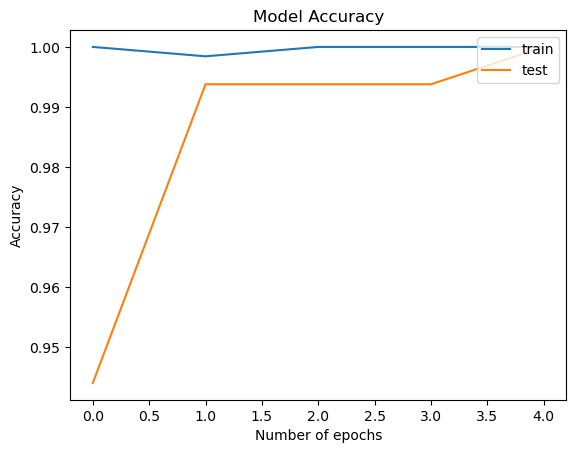

In [272]:
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc = 'upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [273]:
y_pred_test = np.argmax(model.predict(X_test), axis=1)
y_pred_test

6/6 [==============================] - 1s 140ms/step


array([3, 0, 3, 2, 0, 0, 0, 1, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3, 3, 1,
       2, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 1, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0,
       2, 4, 2, 1, 0, 0, 4, 3, 2, 0, 2, 0, 2, 0, 3, 3, 3, 2, 4, 0, 4, 0,
       3, 4, 2, 0, 0, 3, 0, 0, 0, 3, 4, 4, 2, 0, 2, 0, 0, 2, 3, 0, 0, 4,
       1, 1, 1, 2, 0, 0, 0, 4, 3, 1, 1, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0,
       4, 2, 4, 0, 3, 4, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 0, 0, 3, 0, 0, 0,
       4, 2, 1, 0, 4, 3, 4, 0, 0, 2, 4, 3, 4, 1, 2, 0, 4, 2, 0, 4, 0, 2,
       2, 1, 4, 1, 3, 0, 1], dtype=int64)

In [283]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have 'model' for predictions and 'y_test' as the ground truth
y_pred_test = model.predict(X_test)

# Convert both y_pred_test and y_test to binary arrays
y_pred_test_binary = (y_pred_test > 0.5)  # Adjust the threshold as needed
y_test_binary = y_test

precision = precision_score(y_test_binary, y_pred_test_binary, average='micro')
recall = recall_score(y_test_binary, y_pred_test_binary, average='micro')
f1 = f1_score(y_test_binary, y_pred_test_binary, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

6/6 [==============================] - 1s 147ms/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Within the scope of our project, we delved into a gene dataset associated with diverse cancer types. Our primary focus was to condense the dataset's complexity, which we accomplished through Principal Component Analysis (PCA). In the subsequent phase, we engaged in unsupervised learning, using clustering techniques to discern underlying data patterns.

In the pursuit of classifying these cancer types, we harnessed various classification models, including Support Vector Machine (SVM), Random Forest, and Deep Neural Network. Among these models, SVM emerged as the champion, delivering an impressive accuracy rate of 100%. This resounding success underscores the efficacy of our model in effectively distinguishing between different cancer types.